# Introduction

<!-- Theory here -->
This experiment involves the analysis of the following thermodynamic cycle:

![pV Diagram](lab3/diagram.png)

The purpose of a thermodynamic cycle is to convert heat into some useful work. Ideally, one of these cycles has a start point and end point at the same point (hence the term "cycle"). This means that the internal energy $\Delta U$ across the entire cycle must be *zero*. The above cycle is one such ideal cycle. Since a change in a thermodynamic state can be defined as $\Delta U = Q - W$ and $\Delta U_{entire} = 0$, the sum of the input heat and work must be equal to the exhaust heat and output work, or mathematically, $Q_{in} - |Q_{out}| - (\Sigma W) = 0$.

At first glance computing the work done across this process may seem a little tricky. Two processes in this cycle are isobaric, so it follows the sum of the work in these two processes is $(p_b - p_a)\Delta V$. However, we don't know the work done from *a* to *b* nor *c* to *d*. Since these are straight lines, it would be very convenient if the sum of the work in these two processes happens to be zero.  

Since this cycle is basically constructed out of parallelogram, we can say that the work done across the system is approximately the width times the height of the cycle. The reasoning is that *sheer transformations do not affect the area spanned by two vectors*. Mathematically this can be represented as such:

Let the path from *a* to *d* be represented by some vector $\vec{x}$ and the path from *a* to *b* be represented by some vector $\vec{y}$. Firstly we should decompose $\vec{x}$ and $\vec{y}$ into their basis vectors {$\vec{e_1}$, $\vec{e_2}$}, yielding $\vec{x} = x\vec{e_1}$ and $\vec{y} = A\vec{e_1} + B\vec{e_2}$.

Next, let's try the orthogonal case between these two vectors i.e. remove the $\vec{e_1}$ component from $\vec{y}$ and call that $\vec{y'}$. Since $\vec{x}$ and $\vec{y'}$ are orthogonal, the area spanned by these two vectors is the product of the magnitudes of $\vec{x}$ and $\vec{y'}$. 

Another way of describing these vectors is in terms of a transformation matrix of the basis vectors:

In [16]:
%pylab inline --no-import-all
from astropy import units as u
from astropy import constants as const
import sympy as sp

sp.init_printing(use_latex=True)

Populating the interactive namespace from numpy and matplotlib


In [17]:
# Relevant constants
PI     = np.pi
TWO_PI = 2*PI

R      = const.R
g      = const.g0

In [18]:
x, A, B = sp.symbols(['x', 'A', 'B'])

M = sp.Matrix([[x, 0], [0, B]])
M

⎡x  0⎤
⎢    ⎥
⎣0  B⎦

where the column space represents the basis vectors $\vec{e_i}$. The absolute value of the determinant of this matrix yields the area spanned by the transformation:

In [19]:
M.det()

Now let's bring back the $\vec{y}$ into the picture. Suppose instead of having $0\vec{e_1}$ in $\vec{y}$ we have $A\vec{e_1}$ again. This changes the matrix like so:

In [20]:
M = sp.Matrix([[x, 0], [A, B]])
M

⎡x  0⎤
⎢    ⎥
⎣A  B⎦

Computing the determinant, we find:

In [21]:
M.det()

which is the exact same case as the rectangular form. Therefore, we can say that the work done by the above cycle is the same as two isochoric processes and two isobaric processes. This means that the total work done by the system over this cycle is $W = (p_b - p_a)(V_c - V_b)$ (assuming that $|\Delta V_{bc}| \approx |\Delta V_{da}|$).

Now, what would our data look like if there was any gas exchange with the environment? The volume of the gas should increase or decrease if there was an inflow or outflow of gas, respectively. The best way to determine this would be comparing the starting points $a_i$; if as *i* steps increases the volume at $a_i$ decreases, there was probably a leak, and the same idea would hold true for an increase in volume yielding a leak (and inflow).

Since a thermodynamic cycle does not only consist of work, we should also consider the heat exchange in this cycle. The isobaric processes *bc* and *da* are easier to consider at the start. Combining the ideal gas law and the definition of isobaric process, we get:

$p\Delta V = nR\Delta T$

For the above theoretical cycle, this means we have two expressions:

$(T_c - T_b) = \frac{p_b(V_c - V_b)}{nR}$  
$(T_a - T_d) = \frac{p_a(V_a - V_d)}{nR}$

Plugging these temperature differences into the heat equation for a constant pressure:

$Q_{bc} = \frac{C_p p_b(V_c - V_b)}{R} = \frac{C_p W_{bc}}{R}$  
$Q_{da} = \frac{C_p p_a(V_a - V_d)}{R} = \frac{C_p W_{da}}{R}$

The other two processes are a little trickier. We cannot really use the sheer transformation approximation here since the heat is computed differently depending on the path. We know the relations between heat for certain processes (isobaric, isochoric, isothermal, and adiabatic), but it gets much more problematic when the analyzed processes are none of the above (as is the case here).

Even though it is not truly isothermal, we can probably guess that $T_a \approx T_b$ and $T_c \approx T_d$ if the gas chamber had been submerged in the bath long enough, which is what we did in this experiment. If this theoretical cycle happened in rapid succession, this approximation would not be valid as not enough time would have passed for the gas's temperature to completely match the bath's temperature. Since the change in internal energy is totally dependent on the change in temperature alone, we can approximate for these processes:

$|\Delta U_{ab}| = |\Delta U_{cd}| \approx 0$

This means that the heat transfer along these processes must equal the work done on the system in order for the internal energies to remain unchanged. Furthermore, since temperature is constant in these isothermal processes, pressure is inversely proportional to volume. This means that the work done in these processes is logarithmic with respect to the change in volume:

$W = \int_{V_0}^{V_1}pdV = nRT\int_{V_0}^{V_1}\frac{1}{V}dV = nRT\log(\frac{V_1}{V_0})$

Furthermore we can convert the four six unknowns (four volumes and two temperatures) into four unknowns (two pressures and two temperatures, since these processes involve changes between two pressures only) by switching the mode of integration:
  
$\frac{dV}{dp} = \frac{-nRT}{p^2}$  
$dV = \frac{-nRT}{p^2}dp$  
$W = -nRT\int_{p_0}^{p_1}\frac{dp}{p} = -nRT\log(\frac{p_1}{p_0}) = nRT\log(\frac{p_0}{p_1})$

Now we can express the work done and heat exchanged in these "isothermal" processes:

$W_{ab} = -Q_{ab} = nRT_a\log(\frac{p_a}{p_b})$  
$W_{cd} = -Q_{cd} = nRT_c\log(\frac{p_b}{p_a})$

Since $T_c$ is on a higher isotherm than $T_a$ and $p_b$ is greater than $p_a$, it follows that $W_{ab}$ was work done *on* the system and $W_{cd}$ was work done *by* the system. This makes sense considering that from *a* to *b* a mass was added to the piston which would compress the air inside the piston chamber, and likewise the removal of the mass from *c* to *d* would expand the gas in the chamber, provided that there was no leakage. Furthermore, since $Q=-W$ in these processes, it follows that the heat exchange is positive in *ab* and negative in *cd*.

# Materials & Methods

# Results

In [22]:
# Fetch analysis python document
import sys

if (not ('./lab3/' in sys.path)):
    sys.path.append('./lab3/')

import analysis as l3

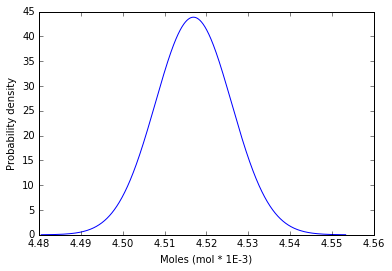

In [30]:
n  = l3.moles((l3.r_cham).to(u.m), (l3.h_cham).to(u.m), l3.T_room)

# Scaled n for easier graphing
ns = [n[0] * 1000, n[1] * 1000]

x_vals = np.linspace(ns[0].value - (4*ns[1].value), ns[0].value + (4*ns[1].value), 1000)

plt.plot(x_vals, mlab.normpdf(x_vals, ns[0].value, ns[1].value))

plt.xlabel('Moles (mol * 1E-3)')
plt.ylabel('Probability density')

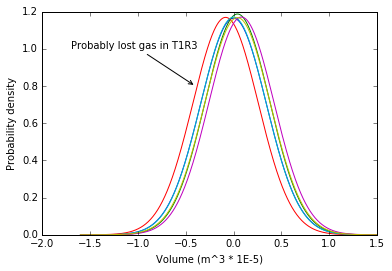

In [29]:
diff11 = l3.diff_vol([l3.t1_r1_a, l3.t1_r1_b, l3.t1_r1_c, l3.t1_r1_d], l3.t1_r1_h0)
diff12 = l3.diff_vol([l3.t1_r2_a, l3.t1_r2_b, l3.t1_r2_c, l3.t1_r2_d], l3.t1_r2_h0)
diff13 = l3.diff_vol([l3.t1_r3_a, l3.t1_r3_b, l3.t1_r3_c, l3.t1_r3_d], l3.t1_r3_h0)
diff21 = l3.diff_vol([l3.t2_r1_a, l3.t2_r1_b, l3.t2_r1_c, l3.t2_r1_d], l3.t2_r1_h0)
diff22 = l3.diff_vol([l3.t2_r2_a, l3.t2_r2_b, l3.t2_r2_c, l3.t2_r2_d], l3.t2_r2_h0)
diff23 = l3.diff_vol([l3.t2_r3_a, l3.t2_r3_b, l3.t2_r3_c, l3.t2_r3_d], l3.t2_r3_h0)

x = np.linspace(-1.6, 1.5, 1000)

plt.plot(x, mlab.normpdf(x, diff11[0].value * 1e5, diff11[1].value * 1e5))
plt.plot(x, mlab.normpdf(x, diff12[0].value * 1e5, diff12[1].value * 1e5))
plt.plot(x, mlab.normpdf(x, diff13[0].value * 1e5, diff13[1].value * 1e5))
plt.plot(x, mlab.normpdf(x, diff21[0].value * 1e5, diff21[1].value * 1e5))
plt.plot(x, mlab.normpdf(x, diff22[0].value * 1e5, diff22[1].value * 1e5))
plt.plot(x, mlab.normpdf(x, diff23[0].value * 1e5, diff23[1].value * 1e5))

plt.axes().annotate('Probably lost gas in T1R3', 
                    xy=(-0.4, 0.8), xycoords='data',
                    xytext=(-1.7, 1), textcoords='data',
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle='arc3'))

plt.xlabel('Volume (m^3 * 1E-5)')
plt.ylabel('Probability density')

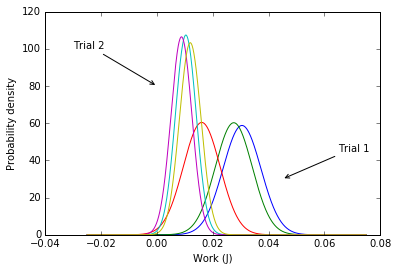

In [28]:
W11 = l3.work([l3.t1_r1_a, l3.t1_r1_b, l3.t1_r1_c, l3.t1_r1_d], l3.t1_r1_h0)
W12 = l3.work([l3.t1_r2_a, l3.t1_r2_b, l3.t1_r2_c, l3.t1_r2_d], l3.t1_r2_h0)
W13 = l3.work([l3.t1_r3_a, l3.t1_r3_b, l3.t1_r3_c, l3.t1_r3_d], l3.t1_r3_h0)
W21 = l3.work([l3.t2_r1_a, l3.t2_r1_b, l3.t2_r1_c, l3.t2_r1_d], l3.t2_r1_h0)
W22 = l3.work([l3.t2_r2_a, l3.t2_r2_b, l3.t2_r2_c, l3.t2_r2_d], l3.t2_r2_h0)
W23 = l3.work([l3.t2_r3_a, l3.t2_r3_b, l3.t2_r3_c, l3.t2_r3_d], l3.t2_r3_h0)

x = np.linspace(-0.025, 0.075, 1000)

plt.plot(x, mlab.normpdf(x, W11[0].value, W11[1].value))
plt.plot(x, mlab.normpdf(x, W12[0].value, W12[1].value))
plt.plot(x, mlab.normpdf(x, W13[0].value, W13[1].value))

plt.plot(x, mlab.normpdf(x, W21[0].value, W21[1].value))
plt.plot(x, mlab.normpdf(x, W22[0].value, W22[1].value))
plt.plot(x, mlab.normpdf(x, W23[0].value, W23[1].value))

plt.axes().annotate('Trial 1', 
                    xy=(0.045, 30), xycoords='data',
                    xytext=(0.065, 45), textcoords='data',
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle='arc3'))

plt.axes().annotate('Trial 2', 
                    xy=(0, 80), xycoords='data',
                    xytext=(-0.03, 100), textcoords='data',
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle='arc3'))

plt.xlabel('Work (J)')
plt.ylabel('Probability density')

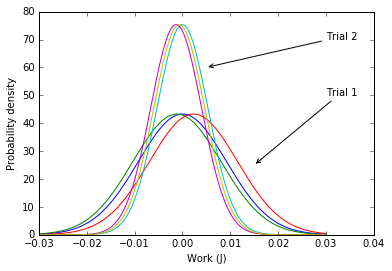

In [27]:
G11 = l3.gravity([l3.t1_r1_a, l3.t1_r1_b, l3.t1_r1_c, l3.t1_r1_d], l3.t1_r1_h0, 200*u.g)
G12 = l3.gravity([l3.t1_r2_a, l3.t1_r2_b, l3.t1_r2_c, l3.t1_r2_d], l3.t1_r2_h0, 200*u.g)
G13 = l3.gravity([l3.t1_r3_a, l3.t1_r3_b, l3.t1_r3_c, l3.t1_r3_d], l3.t1_r3_h0, 200*u.g)
G21 = l3.gravity([l3.t2_r1_a, l3.t2_r1_b, l3.t2_r1_c, l3.t2_r1_d], l3.t2_r1_h0, 100*u.g)
G22 = l3.gravity([l3.t2_r2_a, l3.t2_r2_b, l3.t2_r2_c, l3.t2_r2_d], l3.t2_r2_h0, 100*u.g)
G23 = l3.gravity([l3.t2_r3_a, l3.t2_r3_b, l3.t2_r3_c, l3.t2_r3_d], l3.t2_r3_h0, 100*u.g)

x   = np.linspace(-0.03, 0.03, 1000)

plt.plot(x, mlab.normpdf(x, G11[0].value, G11[1].value))
plt.plot(x, mlab.normpdf(x, G12[0].value, G12[1].value))
plt.plot(x, mlab.normpdf(x, G13[0].value, G13[1].value))
plt.plot(x, mlab.normpdf(x, G21[0].value, G21[1].value))
plt.plot(x, mlab.normpdf(x, G22[0].value, G22[1].value))
plt.plot(x, mlab.normpdf(x, G23[0].value, G23[1].value))

plt.axes().annotate('Trial 1', 
                    xy=(0.015, 25), xycoords='data',
                    xytext=(0.030, 50), textcoords='data',
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle='arc3'))

plt.axes().annotate('Trial 2', 
                    xy=(0.005, 60), xycoords='data',
                    xytext=(0.030, 70), textcoords='data',
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle='arc3'))

plt.xlabel('Work (J)')
plt.ylabel('Probability density')

# Discussion

Since our cycles (see attached figures) resemble the theoretical cycle, it's safe to approximate our cycles as parallelograms and thus as rectangles (for calculating work), which makes the integration part much, much easier. In fact, if we consider the total work by the mass as total work done on the system in processes *ab* and *cd*, Fig. 2 shows that this value centers on 0 J, confirming the theoretical approximations in the aggragate. 

This does not mean that in actuality the work in *ab* and *cd* is identically zero; it means that their sum is approximately zero. Our approximations involve both isothermal processes and isobaric processes, yet *ab* and *cd* are somewhere in between the two. As shown in Fig. 2, there was some drift around zero which allows us to approximate the total work; however, it also means that there could have been some gas exchange or even some friction from the piston.

# Conclusion